# FIND THE NEXT BEST OFFER FOR CUSTOMERS : PREDICTIVE ANALYTICS 

## IMPORTING LIBRARIRIES

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from numpy.random import randn
from numpy.random import seed
import matplotlib.pyplot as plt


### READING THE DATASET

In [2]:
data=pd.read_excel("C:/Users/Student/Desktop/ML/data.xlsx")

## DATA CLEANING AND PREPARATION

In [3]:
data.head(5)

,category,subcategory,name,current_price,raw_price,currency,discount,Quantity,Order Price,likes_count,...,image_url,url,productId,userId,ratings,Income,SpendingScore,Gender,Age,Timestamp
0,accessories,Bucket Hat,Chapeau seau pliable respirant en polyester en...,9.46,22.41,USD,58,3,28.38,20,...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/bucket-hat-12173/p-1322...,1322673,A2CX7LUOHB2NDG,2,34,81,F,32,1341100800
1,beauty,Coffrets Maquillage,7Pcs ensemble de maquillage de rouge Ã lÃ¨vres,27.99,55.99,USD,50,2,55.98,251,...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/hengfang-makeup-set-649...,1331649,A2NWSAGRHCP8N5,1,76,5,F,26,1367193600
2,women,Robes vintage,Robe vintage en velours cÃ´telÃ© unie,42.99,81.99,USD,48,5,214.95,235,...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/vintage-dresses-3664/p-...,1385587,A2WNBOD3WNDNKT,2,38,68,M,44,1374451200
3,kids,Robes,Robe d'allaitement de maternitÃ© fleurie sans ...,22.06,55.57,USD,60,1,22.06,6,...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/maternity-dresses-4706/...,1662745,A1GI0U4ZRJA8WN,2,87,64,M,32,1334707200
4,shoes,Baskets,Sneakers de randonnÃ©e respirants en maille de...,34.64,67.27,USD,49,2,69.28,758,...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/sneakersandathletic-362...,1300576,A1QGNMC6O1VW39,1,20,81,F,29,1397433600


In [4]:
data.shape

(74999, 24)

### CHECK FOR NULL VALUES

In [5]:
data.isnull()

,category,subcategory,name,current_price,raw_price,currency,discount,Quantity,Order Price,likes_count,...,image_url,url,productId,userId,ratings,Income,SpendingScore,Gender,Age,Timestamp
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74994,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

category             0
subcategory          0
name                 0
current_price        0
raw_price            0
currency             0
discount             0
Quantity             0
Order Price          0
likes_count          0
is_new               0
brand            60838
brand_url        64659
codCountry        9110
image_url            1
url                  0
productId            0
userId               0
ratings              0
Income               0
SpendingScore        0
Gender               0
Age                  0
Timestamp            0
dtype: int64

### REMOVE COLUMNS WITH NULL VALUES

In [7]:
data.drop("brand",axis=1,inplace=True)
data.drop("brand_url",axis=1,inplace=True)
data.drop("codCountry",axis=1,inplace=True)
data.drop("image_url",axis=1,inplace=True)

In [8]:
data.isnull().sum()

category         0
subcategory      0
name             0
current_price    0
raw_price        0
currency         0
discount         0
Quantity         0
Order Price      0
likes_count      0
is_new           0
url              0
productId        0
userId           0
ratings          0
Income           0
SpendingScore    0
Gender           0
Age              0
Timestamp        0
dtype: int64

### REMOVE ALL UNNECESSERRY FEATURES FROM THE DATASET

In [9]:
data.drop("subcategory",axis=1,inplace=True)
data.drop("name",axis=1,inplace=True)
data.drop("currency",axis=1,inplace=True)
data.drop("url",axis=1,inplace=True)
data.drop("Timestamp",axis=1,inplace=True)



### ELIMINATE ROWS WITH NA VALUES


In [10]:
data = data.dropna(axis=0, subset=['category'])
data = data.dropna(axis=0, subset=['current_price'])
data = data.dropna(axis=0, subset=['raw_price'])
data = data.dropna(axis=0, subset=['discount'])
data = data.dropna(axis=0, subset=['Quantity'])
data = data.dropna(axis=0, subset=['Order Price'])
data = data.dropna(axis=0, subset=['likes_count'])
data = data.dropna(axis=0, subset=['is_new'])
data = data.dropna(axis=0, subset=['productId'])
data = data.dropna(axis=0, subset=['ratings'])
data = data.dropna(axis=0, subset=['userId'])
data = data.dropna(axis=0, subset=['SpendingScore'])
data = data.dropna(axis=0, subset=['Gender'])
data = data.dropna(axis=0, subset=['Age'])


### CHECK FOR DUPLICATE DATA

In [11]:
dup=data.duplicated()
print(dup.sum())
data[dup]

0


,category,current_price,raw_price,discount,Quantity,Order Price,likes_count,is_new,productId,userId,ratings,Income,SpendingScore,Gender,Age


### STATISTICAL FEATURES


In [12]:
data.mean()


current_price    2.456743e+01
raw_price        5.159344e+01
discount         5.150727e+01
Quantity         3.002747e+00
Order Price      7.381649e+01
likes_count      1.942795e+02
is_new           3.276044e-02
productId        1.418266e+06
ratings          2.995960e+00
Income           5.759438e+01
SpendingScore    5.050591e+01
Age              4.150830e+01
dtype: float64

In [13]:
data.median()


current_price         20.24
raw_price             43.75
discount              50.00
Quantity               3.00
Order Price           53.70
likes_count           71.00
is_new                 0.00
productId        1414760.00
ratings                3.00
Income                58.00
SpendingScore         51.00
Age                   42.00
dtype: float64

In [14]:
data.max()


category                 women
current_price          1899.99
raw_price               5089.0
discount                   100
Quantity                     5
Order Price            5699.97
likes_count              21547
is_new                    True
productId              1724670
userId           AZZZEWADNFNUM
ratings                      5
Income                     100
SpendingScore              100
Gender                       M
Age                         65
dtype: object

In [15]:
data.min()


category                   accessories
current_price                     0.06
raw_price                          0.0
discount                             0
Quantity                             1
Order Price                       0.06
likes_count                          0
is_new                           False
productId                         8189
userId           A001944026UMZ8T3K5QH1
ratings                              1
Income                              15
SpendingScore                        1
Gender                               F
Age                                 18
dtype: object

In [16]:
data.mode()


,category,current_price,raw_price,discount,Quantity,Order Price,likes_count,is_new,productId,userId,ratings,Income,SpendingScore,Gender,Age
0,women,19.99,39.99,50.0,4.0,99.95,0.0,False,78267,A231WM2Z2JL0U3,1.0,70.0,41.0,M,54.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79950,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,907293,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,971648,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003346,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1713184,NaN,NaN,NaN,NaN,NaN,NaN
479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1713784,NaN,NaN,NaN,NaN,NaN,NaN
480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1713803,NaN,NaN,NaN,NaN,NaN,NaN
481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1713869,NaN,NaN,NaN,NaN,NaN,NaN


### EXPLORATORY DATA ANALYSIS

C:\Users\Student\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='current_price', ylabel='Density'>

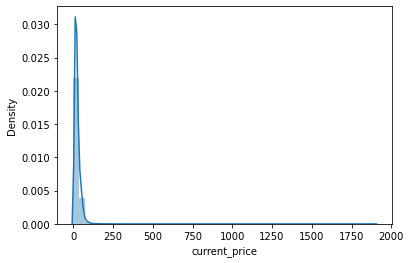

In [17]:
sns.distplot(data['current_price'])



C:\Users\Student\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='raw_price', ylabel='Density'>

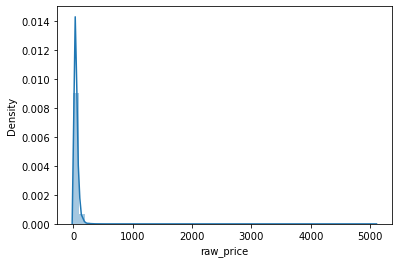

In [18]:
sns.distplot(data['raw_price'])



<AxesSubplot:xlabel='Order Price', ylabel='Density'>

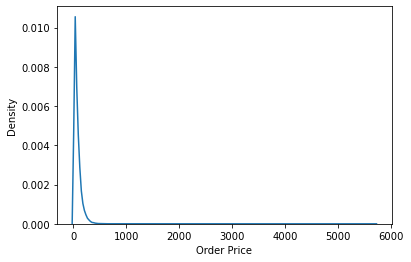

In [19]:
sns.kdeplot(data['Order Price'])


<AxesSubplot:xlabel='discount', ylabel='Density'>

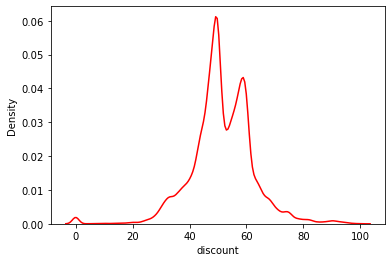

In [20]:
sns.kdeplot(data['discount'], color='r')


<AxesSubplot:xlabel='SpendingScore', ylabel='Density'>

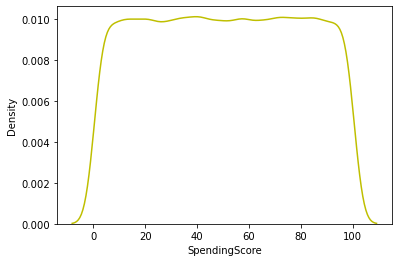

In [21]:
sns.kdeplot(data['SpendingScore'], color='y')

### CORRELATION

In [22]:
data.corr()

,current_price,raw_price,discount,Quantity,Order Price,likes_count,is_new,productId,ratings,Income,SpendingScore,Age
current_price,1.000000,0.853663,-0.156816,0.001505,0.817131,0.037084,-0.006942,0.089683,0.000805,0.001244,0.000982,-0.006135
raw_price,0.853663,1.000000,0.099600,0.000385,0.696192,0.036895,0.007571,0.082403,-0.002333,0.001465,0.000043,-0.006060
discount,-0.156816,0.099600,1.000000,0.005323,-0.130610,-0.002406,0.003879,-0.052751,-0.000966,-0.000990,0.004550,0.006146
Quantity,0.001505,0.000385,0.005323,1.000000,0.447317,0.006323,-0.009249,-0.006783,0.000459,-0.008120,-0.004417,-0.000337
Order Price,0.817131,0.696192,-0.130610,0.447317,1.000000,0.032497,-0.011086,0.073536,0.001152,-0.002301,-0.000037,-0.007685
likes_count,0.037084,0.036895,-0.002406,0.006323,0.032497,1.000000,-0.066408,-0.168748,-0.002719,-0.002553,0.004639,-0.002284
is_new,-0.006942,0.007571,0.003879,-0.009249,-0.011086,-0.066408,1.000000,0.242439,-0.003553,0.001296,-0.002636,-0.010345
productId,0.089683,0.082403,-0.052751,-0.006783,0.073536,-0.168748,0.242439,1.000000,-0.003017,0.008815,-0.003834,0.002317
ratings,0.000805,-0.002333,-0.000966,0.000459,0.001152,-0.002719,-0.003553,-0.003017,1.000000,-0.003370,0.000832,-0.005037
Income,0.001244,0.001465,-0.000990,-0.008120,-0.002301,-0.002553,0.001296,0.008815,-0.003370,1.000000,0.002405,0.001136


In [23]:
#set_option('precision',3)
correlations=data.corr(method='pearson')
correlations

,current_price,raw_price,discount,Quantity,Order Price,likes_count,is_new,productId,ratings,Income,SpendingScore,Age
current_price,1.000000,0.853663,-0.156816,0.001505,0.817131,0.037084,-0.006942,0.089683,0.000805,0.001244,0.000982,-0.006135
raw_price,0.853663,1.000000,0.099600,0.000385,0.696192,0.036895,0.007571,0.082403,-0.002333,0.001465,0.000043,-0.006060
discount,-0.156816,0.099600,1.000000,0.005323,-0.130610,-0.002406,0.003879,-0.052751,-0.000966,-0.000990,0.004550,0.006146
Quantity,0.001505,0.000385,0.005323,1.000000,0.447317,0.006323,-0.009249,-0.006783,0.000459,-0.008120,-0.004417,-0.000337
Order Price,0.817131,0.696192,-0.130610,0.447317,1.000000,0.032497,-0.011086,0.073536,0.001152,-0.002301,-0.000037,-0.007685
likes_count,0.037084,0.036895,-0.002406,0.006323,0.032497,1.000000,-0.066408,-0.168748,-0.002719,-0.002553,0.004639,-0.002284
is_new,-0.006942,0.007571,0.003879,-0.009249,-0.011086,-0.066408,1.000000,0.242439,-0.003553,0.001296,-0.002636,-0.010345
productId,0.089683,0.082403,-0.052751,-0.006783,0.073536,-0.168748,0.242439,1.000000,-0.003017,0.008815,-0.003834,0.002317
ratings,0.000805,-0.002333,-0.000966,0.000459,0.001152,-0.002719,-0.003553,-0.003017,1.000000,-0.003370,0.000832,-0.005037
Income,0.001244,0.001465,-0.000990,-0.008120,-0.002301,-0.002553,0.001296,0.008815,-0.003370,1.000000,0.002405,0.001136


### COVARIANCE

In [24]:
covariance=data.cov()
covariance

,current_price,raw_price,discount,Quantity,Order Price,likes_count,is_new,productId,ratings,Income,SpendingScore,Age
current_price,480.995851,957.729322,-37.564925,0.046712,1.395577e+03,4.315069e+02,-0.027101,4.366086e+05,0.024948,0.675512,0.621184,-1.866618
raw_price,957.729322,2616.803648,55.650195,0.027887,2.773358e+03,1.001349e+03,0.068941,9.357096e+05,-0.168749,1.856403,0.062780,-4.300452
discount,-37.564925,55.650195,119.301232,0.082276,-1.110939e+02,-1.394370e+01,0.007542,-1.278991e+05,-0.014924,-0.267824,1.433045,0.931274
Quantity,0.046712,0.027887,0.082276,2.002659,4.929587e+01,4.747639e+00,-0.002330,-2.130629e+03,0.000918,-0.284613,-0.180261,-0.006610
Order Price,1395.576700,2773.358259,-111.093861,49.295869,6.064323e+03,1.342655e+03,-0.153679,1.271169e+06,0.126889,-4.438203,-0.082799,-8.302498
likes_count,431.506919,1001.349457,-13.943698,4.747639,1.342655e+03,2.814856e+05,-6.271844,-1.987370e+07,-2.039432,-33.545249,70.982013,-16.812835
is_new,-0.027101,0.068941,0.007542,-0.002330,-1.536786e-01,-6.271844e+00,0.031688,9.579886e+03,-0.000894,0.005715,-0.013534,-0.025546
productId,436608.640035,935709.603431,-127899.108218,-2130.629473,1.271169e+06,-1.987370e+07,9579.886179,4.927479e+10,-946.934150,48466.844262,-24544.176766,7134.319809
ratings,0.024948,-0.168749,-0.014924,0.000918,1.268892e-01,-2.039432e+00,-0.000894,-9.469342e+02,1.999197,-0.118029,0.033911,-0.098802
Income,0.675512,1.856403,-0.267824,-0.284613,-4.438203e+00,-3.354525e+01,0.005715,4.846684e+04,-0.118029,613.498649,1.717998,0.390464


### CLASS COUNTS

In [27]:
class_counts=data.groupby('current_price').size()
class_counts

current_price
0.06       2
0.14       3
0.22       1
0.26       1
0.29       1
          ..
733.49     1
743.99     1
799.99     1
1157.99    1
1899.99    2
Length: 6116, dtype: int64

In [28]:
class_counts=data.groupby('raw_price').size()
class_counts

raw_price
0.00       372
1.97         1
2.06         1
3.00         1
3.61         1
          ... 
2129.93      1
2189.03      1
2396.14      1
3999.99      2
5089.00      1
Length: 11576, dtype: int64

<AxesSubplot:>

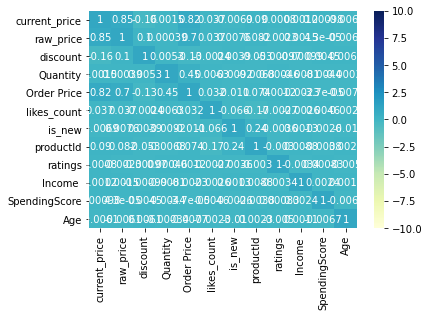

In [29]:
sns.heatmap(data.corr(), vmin=-10, vmax=10, cmap='YlGnBu', annot=True)

In [30]:
data.plot

<AxesSubplot:xlabel='current_price'>

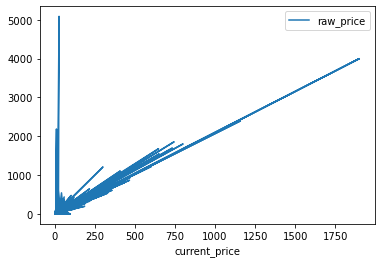

In [31]:
data.plot(x='current_price',y='raw_price')

<AxesSubplot:xlabel='current_price'>

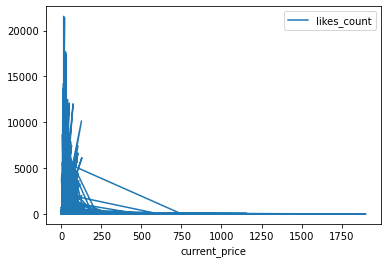

In [32]:
data.plot(x='current_price',y='likes_count')

<AxesSubplot:xlabel='discount'>

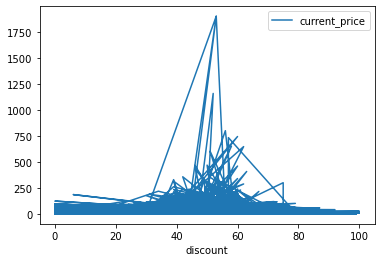

In [33]:
data.plot(x='discount',y='current_price')

<AxesSubplot:xlabel='is_new'>

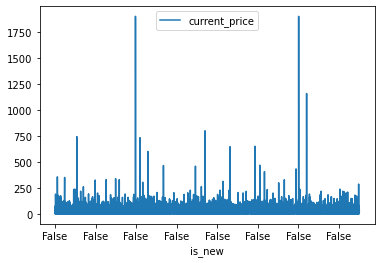

In [34]:
data.plot(x='is_new',y='current_price')

C:\Users\Student\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Raw Price')

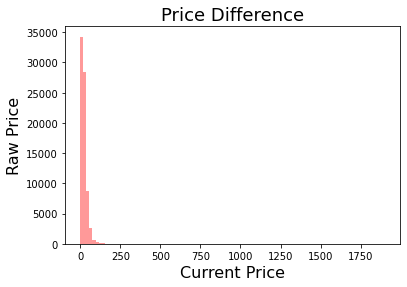

In [35]:
sns.distplot(data['current_price'], kde=False, color='red', bins=100)
plt.title('Price Difference', fontsize=18)
plt.xlabel('Current Price', fontsize=16)
plt.ylabel('Raw Price', fontsize=16)

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


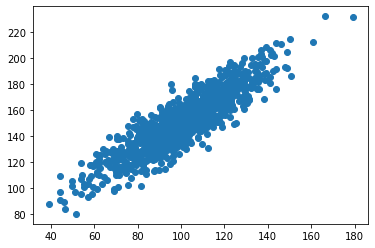

In [36]:
seed(1)
data1=data['current_price']
data2=data['ratings']
data1=20*randn(1000)+100
data2=data1+(10*randn(1000)+50)
print('data1: mean=%.3f stdv=%.3f'%(mean(data1),std(data1)))
print('data2: mean=%.3f stdv=%.3f'%(mean(data2),std(data2)))
plt.scatter(data1,data2)
plt.show()

### SKEWNESS



In [37]:
print("Skewness: %f" % data['current_price'].skew())
print("Skewness: %f" % data['raw_price'].skew())
print("Skewness: %f" % data['ratings'].skew())
#print("Skewness: %f" % data['Income'].skew())




Skewness: 23.004236
Skewness: 32.483431
Skewness: 0.003690


In [38]:
skew=data.skew()
skew

current_price    23.004236
raw_price        32.483431
discount         -0.256922
Quantity         -0.005023
Order Price      13.037912
likes_count      11.868979
is_new            5.249723
productId        -0.686683
ratings           0.003690
Income           -0.005411
SpendingScore    -0.001840
Age              -0.003513
dtype: float64

# ALGORITHMS

## RECOMMEDNATION SYSTEM

### CONTENT BASED FILTERING

In [39]:
#v is the number of likes for the product ;
#m is the minimum likes required to be listed in the dataset;
#R is the average rating of the product;
#C is the mean rating across the whole data.

In [48]:
m = data['likes_count'].quantile(0.90)
data1 = data.copy().loc[data['likes_count'] >= m]
data1.shape

(7527, 15)

In [49]:
C = data['ratings'].mean()
C

2.995959946132615

In [50]:
def weighted_rating(x, m=m, C=C):
    l = x['likes_count']
    R = x['ratings']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [51]:
v=1048

In [52]:
data1['score'] = data1.apply(weighted_rating, axis=1)
data1 = data1.sort_values('score', ascending=False)
data1[['likes_count', 'ratings', 'score']].head(20)
data1['category'].unique()
data1.head(10)

,category,current_price,raw_price,discount,Quantity,Order Price,likes_count,is_new,productId,userId,ratings,Income,SpendingScore,Gender,Age,score
51053,shoes,27.84,62.76,56,1,27.84,600,False,1440444,A1VQHH85U7PX0,5,69,9,F,60,4.448404
64769,jewelry,5.59,15.90,65,1,5.59,621,False,1159885,A10FAJMY3OUVGH,5,94,94,M,60,4.448404
12027,bags,34.32,73.12,53,1,34.32,403,False,1283511,A1R1A3P87BIWWB,5,38,9,M,55,4.448404
23400,women,27.99,54.87,49,5,139.95,885,False,1377243,A6XDEW1U9M2SE,5,97,88,M,59,4.448404
53237,shoes,31.07,87.96,65,1,31.07,478,False,1164856,A2ARD9MFNHR79X,5,96,43,F,26,4.448404
38355,women,39.87,99.94,60,2,79.74,1075,False,1219102,A3TE1A0XJWOHZD,5,88,86,F,39,4.448404
53253,women,12.99,53.34,76,3,38.97,713,False,1123489,AH9FCFS4PCUVE,5,96,18,M,43,4.448404
37216,women,10.12,22.99,56,4,40.48,1193,False,1026755,A1QAYXPP08I7KS,5,55,33,M,26,4.448404
31066,women,32.99,71.15,54,1,32.99,1243,False,1259656,AOJBKPV6ELTE9,5,94,99,M,37,4.448404
11969,men,35.19,51.99,32,5,175.95,1022,False,1588230,AJQS6UG45VZPK,5,67,70,F,44,4.448404


In [45]:
data.shape

(74999, 15)

In [46]:
data1.shape

(7527, 16)

### (7527/74999)*100 =  10% 
### data 1 contains top 10% of all the products and are highly recommendeded to the customers.